In [1]:
from datascience import *
%matplotlib inline
path_data = '../../assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import pylab as pl
import numpy as np

# Properties of the Mean

In this course, we have used the words "average" and "mean" interchangeably, and will continue to do so. The definition of the mean will be familiar to you from your high school days or even earlier.

**Definition.** The *average* or *mean* of a collection of numbers is the sum of all the elements of the collection, divided by the number of elements in the collection.

The methods `np.average` and `np.mean` return the mean of an array. 

In [2]:
not_symmetric = make_array(2, 3, 3, 9)

In [3]:
np.average(not_symmetric)

4.25

In [4]:
np.mean(not_symmetric)

4.25

## Basic Properties

The definition and the example above point to some properties of the mean.

- It need not be an element of the collection.
- It need not be an integer even if all the elements of the collection are integers.
- It is somewhere between the smallest and largest values in the collection.
- It need not be halfway between the two extremes; it is not in general true that half the elements in a collection are above the mean.
- If the collection consists of values of a variable measured in specified units, then the mean has the same units too.

We will now study some other properties that are helpful in understanding the mean and its relation to other statistics.

## The Mean is a "Smoother"

You can think of taking the mean as an "equalizing" or "smoothing" operation. For example, imagine the entries in `not_symmetric` above as the dollars in the pockets of four different people. To get the mean, you first put all of the money into one big pot and then divide it evenly among the four people. They had started out with different amounts of money in their pockets (\$2, \$3, \$3, and \$9), but now each person has \$4.25, the mean amount.

## Proportions are Means
If a collection consists only of ones and zeroes, then the sum of the collection is the number of ones in it, and the mean of the collection is the proportion of ones.

In [5]:
zero_one = make_array(1, 1, 1, 0)
sum(zero_one)

3

In [6]:
np.mean(zero_one)

0.75

You can replace 1 by the Boolean `True` and 0 by `False`:

In [7]:
np.mean(make_array(True, True, True, False))

0.75

Because proportions are a special case of means, results about random sample means apply to random sample proportions as well.

## The Mean and the Histogram
The mean of the collection {2, 3, 3, 9} is 4.25, which is not the "halfway point" of the data. So then what does the mean measure?

To see this, notice that the mean can be calculated in different ways.

$$\begin{align*}
\mbox{mean} ~ &=~ 4.25 \\ \\
&=~ \frac{2 + 3 + 3 + 9}{4} \\ \\
&=~ 2 \cdot \frac{1}{4} ~~ + ~~ 3 \cdot \frac{1}{4} ~~ + ~~ 3 \cdot \frac{1}{4} ~~ + ~~ 9 \cdot \frac{1}{4} \\ \\
&=~ 2 \cdot \frac{1}{4} ~~ + ~~ 3 \cdot \frac{2}{4} ~~ + ~~ 9 \cdot \frac{1}{4} \\ \\
&=~ 2 \cdot 0.25 ~~ + ~~ 3 \cdot 0.5 ~~ + ~~ 9 \cdot 0.25
\end{align*}$$

The last expression is an example of a general fact: when we calculate the mean, each distinct value in the collection is *weighted* by the proportion of times it appears in the collection.

This has an important consequence. The mean of a collection depends only on the distinct values and their proportions, not on the number of elements in the collection. In other words, the mean of a collection depends only on the distribution of values in the collection.

Therefore, **if two collections have the same distribution, then they have the same mean.**

For example, here is another collection that has the same distribution as `not_symmetric` and hence the same mean.

In [8]:
not_symmetric

array([2, 3, 3, 9], dtype=int64)

In [9]:
same_distribution = make_array(2, 2, 3, 3, 3, 3, 9, 9)
np.mean(same_distribution)

4.25

The mean is a physical attribute of the histogram of the distribution. Here is the histogram of the distribution of `not_symmetric` or equivalently the distribution of `same_distribution`.

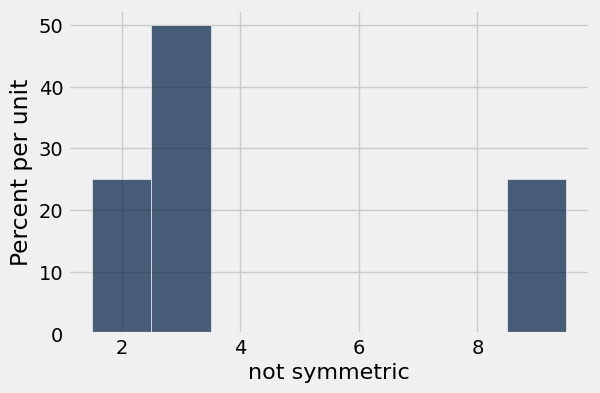

In [10]:
t1 = Table().with_columns('not symmetric', not_symmetric)
t1.hist(bins=np.arange(1.5, 9.6, 1))

Imagine the histogram as a figure made out of cardboard attached to a wire that runs along the horizontal axis, and imagine the bars as weights attached at the values 2, 3, and 9. Suppose you try to balance this figure on a point on the wire. If the point is near 2, the figure will tip over to the right. If the point is near 9, the figure will tip over to the left. Somewhere in between is the point where the figure will balance; that point is the 4.25, the mean.

**The mean is the center of gravity or balance point of the histogram.**

To understand why that is, it helps to know some physics. The center of gravity is calculated exactly as we calculated the mean, by using the distinct values weighted by their proportions.

Because the mean is a balance point, it is sometimes displayed as a *fulcrum* or triangle at the base of the histogram.

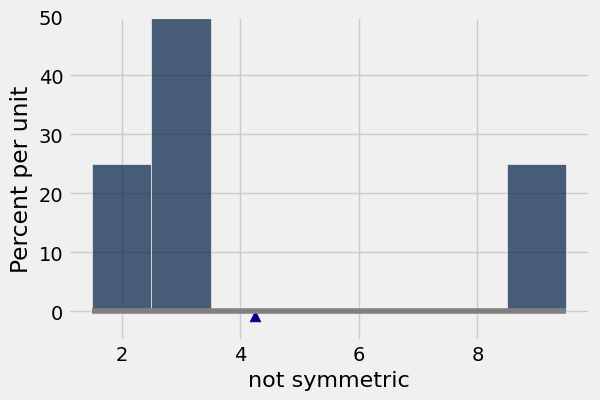

In [11]:
mean_ns = np.mean(not_symmetric)
t1.hist(bins=np.arange(1.5, 9.6, 1))
plots.scatter(mean_ns, -0.009, marker='^', color='darkblue', s=60)
plots.plot([1.5, 9.5], [0, 0], color='grey')
plots.ylim(-0.05, 0.5);

## The Mean and the Median

If a student's score on a test is below average, does that imply that the student is in the bottom half of the class on that test?

Happily for the student, the answer is, "Not necessarily." The reason has to do with the relation between the average, which is the balance point of the histogram, and the median, which is the "half-way point" of the data.

The relationship is easy to see in a simple example. Here is a histogram of the collection {2, 3, 3, 4} which is in the array `symmetric`. The distribution is symmetric about 3. The mean and the median are both equal to 3.

In [12]:
symmetric = make_array(2, 3, 3, 4)

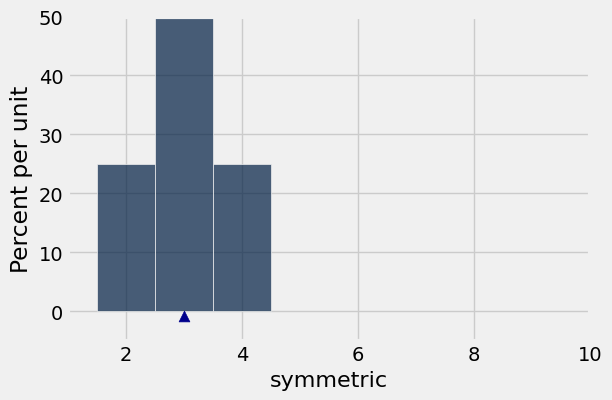

In [13]:
t2 = Table().with_columns('symmetric', symmetric)
mean_s = np.mean(symmetric)

t2.hist(bins=np.arange(1.5, 4.6, 1))
plots.scatter(mean_s, -0.009, marker='^', color='darkblue', s=60)
plots.xlim(1, 10)
plots.ylim(-0.05, 0.5);

In [14]:
np.mean(symmetric)

3.0

In [15]:
percentile(50, symmetric)

3

In general, **for symmetric distributions, the mean and the median are equal.**

What if the distribution is not symmetric? Let's compare `symmetric` and `not_symmetric`.

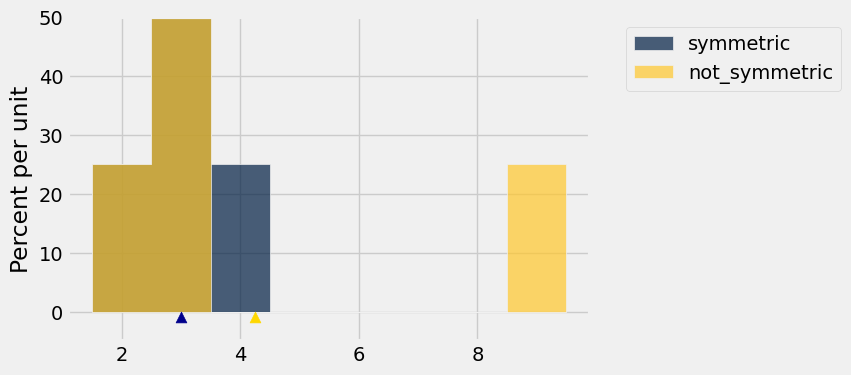

In [16]:
t3 = t2.with_column(
        'not_symmetric', not_symmetric
)

t3.hist(bins=np.arange(1.5, 9.6, 1))
plots.scatter(mean_s, -0.009, marker='^', color='darkblue', s=60)
plots.scatter(mean_ns, -0.009, marker='^', color='gold', s=60)
plots.ylim(-0.05, 0.5);

The blue histogram represents the original `symmetric` distribution. The gold histogram of `not_symmetric` starts out the same as the blue at the left end, but its rightmost bar has slid over to the value 9. The brown part is where the two histograms overlap.

The median and mean of the blue distribution are both equal to 3. The median of the gold distribution is also equal to 3, though the right half is distributed differently from the left. 

But the mean of the gold distribution is not 3: the gold histogram would not balance at 3. The balance point has shifted to the right, to 4.25.

In the gold distribution, 3 out of 4 entries (75%) are below average. The student with a below average score can therefore take heart. He or she might be in the majority of the class.

In general, **if the histogram has a tail on one side (the formal term is "skewed"), then the mean is pulled away from the median in the direction of the tail.**

### Example ###
The table `sf2015` contains salary and benefits data for San Francisco City employees in 2015. As before, we will restrict our analysis to those who had the equivalent of at least half-time employment for the year.

In [17]:
sf2015 = Table.read_table(path_data + 'san_francisco_2015.csv').where('Salaries', are.above(10000))

As we saw earlier, the highest compensation was above \$600,000 but the vast majority of employees had compensations below \$300,000.

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\datascience\tables.py:5865: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


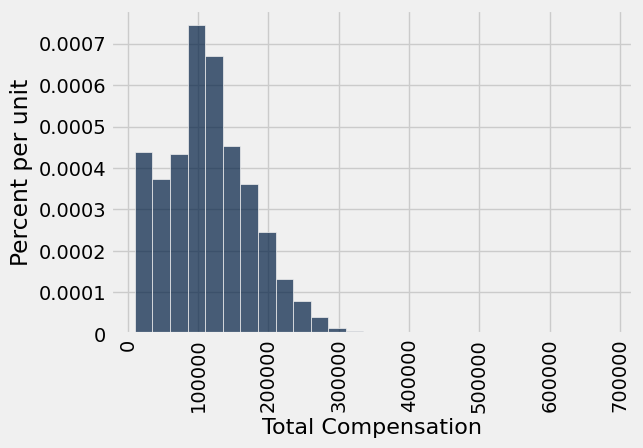

In [18]:
sf2015.select('Total Compensation').hist(bins = np.arange(10000, 700000, 25000))

This histogram is skewed to the right; it has a right-hand tail. 

The mean gets pulled away from the median in the direction of the tail. So we expect the mean compensation to be larger than the median, and that is indeed the case.

In [19]:
compensation = sf2015.column('Total Compensation')
percentile(50, compensation)

110305.78999999999

In [20]:
np.mean(compensation)

114725.98411824222

Distributions of incomes of large populations tend to be right skewed. When the bulk of a population has middle to low incomes, but a very small proportion has very high incomes, the histogram has a long, thin tail to the right. 

The mean income is affected by this tail: the farther the tail stretches to the right, the larger the mean becomes. But the median is not affected by values at the extremes of the distribution. That is why economists often summarize income distributions by the median instead of the mean.